In [5]:
# 🧩 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# 🧩 Step 2: Load Dataset
df = pd.read_csv("Mall_Customers.csv")
print("✅ Data loaded successfully!")
df.head()


✅ Data loaded successfully!


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
!pip install seaborn


In [3]:
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 95.5 MB/s eta 0:00:00ta 0:00:01


🧩 Veri Seti Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

📊 Temel İstatistikler:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000             

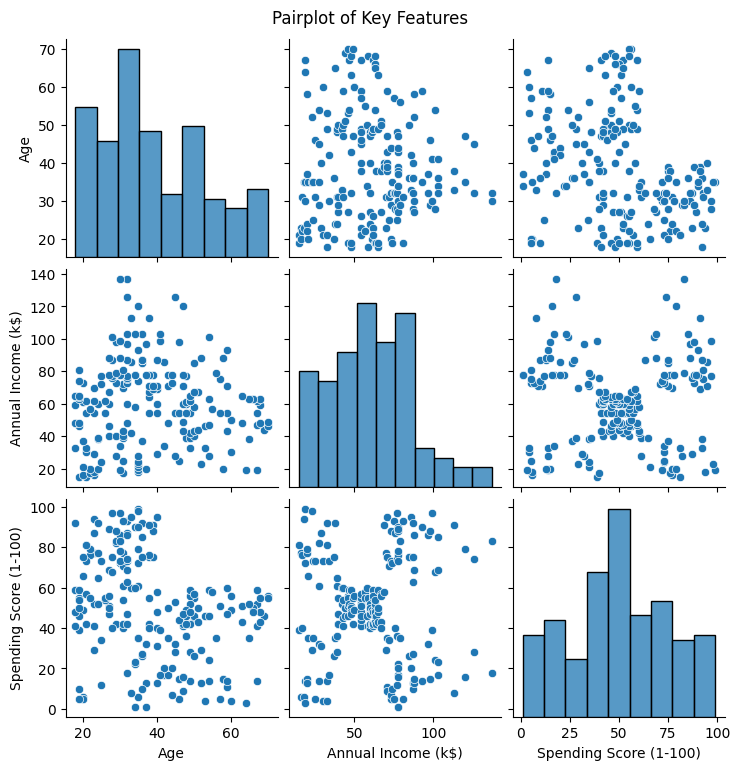

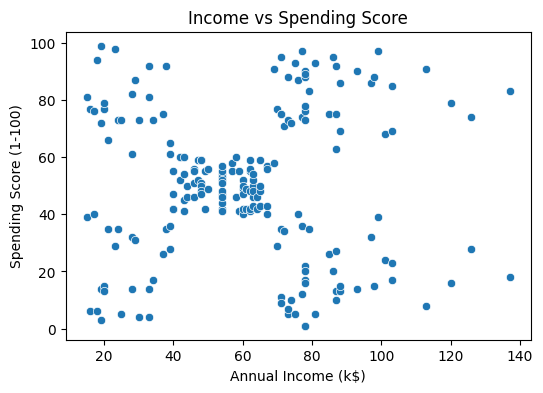

In [6]:
# 🧭 Step 3: Explore the Data
print("🧩 Veri Seti Bilgisi:")
print(df.info())
print("\n📊 Temel İstatistikler:")
print(df.describe())

# 🔍 Eksik veri kontrolü
print("\n❓ Eksik veri sayısı:")
print(df.isnull().sum())

# 🎨 Görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

# Gelir ve harcama skorlarının dağılımını inceleyelim
plt.figure(figsize=(6,4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Income vs Spending Score')
plt.show()


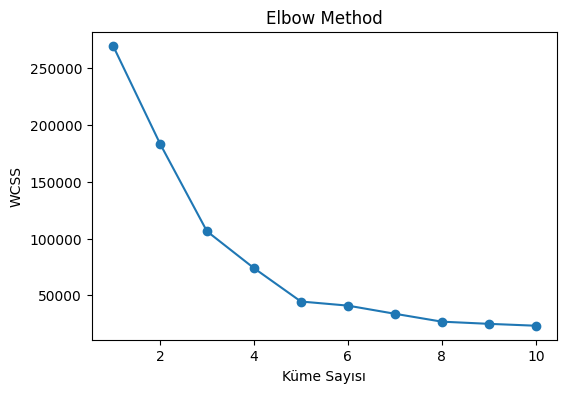

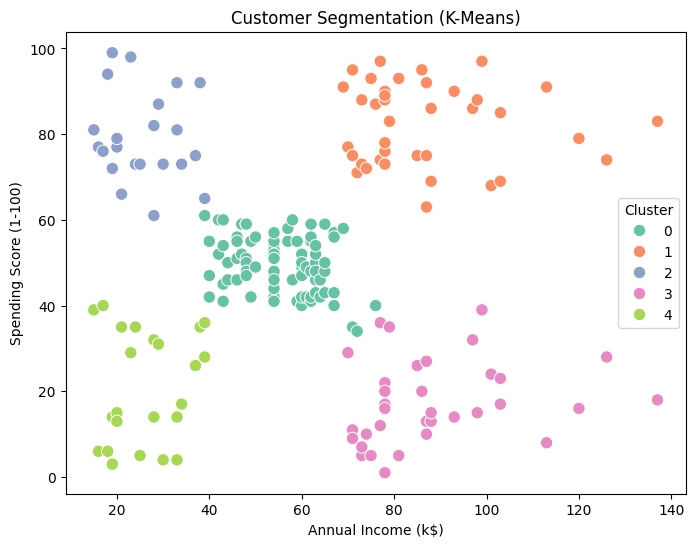

✅ Segmentasyon tamamlandı. Veri kümesine 'Cluster' sütunu eklendi.


In [7]:
# 🧩 Step 4: K-Means Clustering
from sklearn.cluster import KMeans

# Modelde kullanılacak değişkenler
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 🔍 Optimum küme sayısını belirlemek için Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS')
plt.show()

# ✨ 5 küme seçerek modeli uygulayalım
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# 🎨 Kümeleri görselleştirme
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set2', s=80)
plt.title('Customer Segmentation (K-Means)')
plt.show()

print("✅ Segmentasyon tamamlandı. Veri kümesine 'Cluster' sütunu eklendi.")
